In [2]:
!pip install numpy pandas seaborn matplotlib

  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 2.9 MB/s eta 0:00:00a 0:00:01
Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl (11.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 3.3 MB/s eta 0:00:0000:0100:01
Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 3.5 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-

In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data/train.csv')
df.shape

(404290, 6)

In [9]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [11]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
318461,318461,443818,443819,If the land masses were spread out the same wa...,What would the world be like if the land masse...,1
274591,274591,393257,196148,Which are some great movies of Hollywood that ...,Which Hollywood movies should I watch?,0
3924,3924,7773,7774,Do king snakes bite? How dangerous are they?,How can I tell if my dog was bitten by a snake...,0
309631,309631,433641,433642,I think I love my neighbour. She is my age and...,I love a married woman. She has a boyfriend al...,0
176734,176734,163958,207422,Why do people in relationships cheat?,Why does people to cheat?,1
82027,82027,139191,139192,What are the latest research topics in require...,What should be new research topic in requireme...,0
327582,327582,4250,1347,What is your reaction about the ban on Rs. 500...,What's your opinion about the decision on remo...,1
283226,283226,403293,403294,What is it like living in India?,What is it like to live in India?,1
237216,237216,64957,348336,How do you charge your Macbook Pro without a c...,Does RadioShack carry MacBook Pro chargers?,0
69544,69544,42275,24180,How can I control my emotion and fears?,How do I control my emotion and feeling?,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [13]:
# check for missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [15]:
# duplicate rows
df.duplicated().sum()

np.int64(0)

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

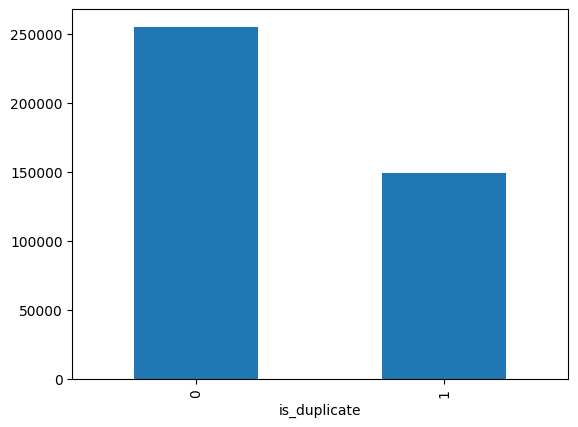

In [16]:
# distribution of duplicate and non-duplicate question pairs
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [17]:
# repeated questions
qid = pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('Number of unique questions', np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated', x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


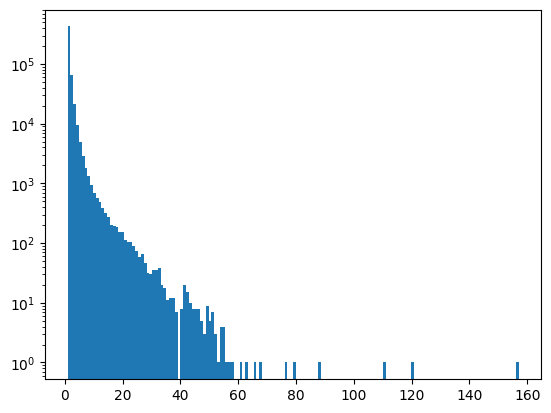

In [18]:
# repeated questions histogram
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()